<a href="https://colab.research.google.com/github/dhrisandamedhi/Retail_store/blob/main/EDA_retail_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail_store



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
#####**Name**-Dhrisanda Medhi


# **Project Summary -**

Write the summary here within 500-600 words.

This dataset is a live dataset of Rossmann Stores. On analsysing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem. In this Notebook we work on following topics

Analysing the Dataset by using Exploratory Data Analysis. Using Exponential Moving Averages analyse Trends and Seasonality in Roseman dataset. Analyse Regression analysis using following prediction analysis, A. Linear Regression Analysis B. Elastic Regression ( Lasso and Ridge Regression). C. Random Forest Regression. d.adaboost and Xgboost).

By applying above algorthim we find accuracy of 97% by Xgboost.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. Data Description Rossmann Stores Data.csv - historical data including Sales store.csv - supplemental information about the stores Data fields Most of the fields are self-explanatory. Id - an Id that represents a (Store, Da,,te) duple within the set Store - a unique Id for each store Sales - the turnover for any given day (Dependent Variable) Customers - the number of customers on a given day

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
# importing all libraries required in the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime as dt
import missingno as msno
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [4]:
# Load Dataset
store_test= pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/store.csv')
store_train = pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/Rossmann Stores Data.csv')

<ipython-input-4-475fb60ce062>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  store_train = pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/Rossmann Stores Data.csv')


#***Analyze Rossmann Store dataset***

### Dataset First View

In [ ]:
# Dataset First Look
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


->First 5 Rows of the dataset.

In [ ]:
#tail of the dataset
store_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


->Last five rows of the dataset.

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
store_train.shape

(1017209, 9)

### Dataset Information

In [ ]:
# Dataset Info
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
store_train.duplicated().sum()


0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
store_train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<Axes: >

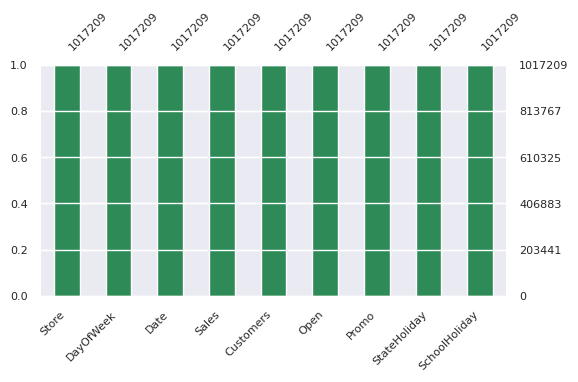

In [ ]:
# Visualizing the missing values
msno.bar(store_train, figsize=(6,3), fontsize=8, color="seagreen")


### What did you know about your dataset?

Answer Here

->  Dateset has 1017209 rows and 9 columns.

-> 2 columns are object type and 7 columns are int type.

-> No duplicate value in the dataset.

-> 0 Null value in this dataset.






## ***2. Understanding Your Variables***

In [ ]:
# Dataset Describe
store_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description 

Answer Here:

**Store** - a unique Id for each store.

**Sales** - the turnover for any given day (this is what you are predicting).

**Customers** - the number of customers on a given day.

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open.

**Date**:  are assign here.It is object type so we need to covert it to date.

**Dayofweek**:number of day in a week .


**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None.


**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools.

**Promo** - indicates whether a store is running a promo on that day.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

In [ ]:
store_train.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [ ]:
store_train.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6])

In [ ]:
store_train.Date.unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [ ]:
store_train.Sales.unique()

array([ 5263,  6064,  8314, ...,   660, 17815, 23303])

In [ ]:
store_train.Customers.unique()

array([ 555,  625,  821, ..., 3900,   36, 4065])

In [ ]:
store_train.Open.unique()

array([1, 0])

In [ ]:
store_train.Promo.unique()

array([1, 0])

In [ ]:
store_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
store_train.SchoolHoliday.unique()

array([1, 0])

###Convert Date columns int to datetime

In [5]:
# code for changing format of date from object to datetime
store_train['Date'] = pd.to_datetime(store_train['Date'], format= '%Y-%m-%d')


In [6]:
#check first date
store_train['Date'].min()

Timestamp('2013-01-01 00:00:00')

In [7]:
#check last date
store_train['Date'].max()


Timestamp('2015-07-31 00:00:00')

In [8]:
#Change data types object to int 
store_train.loc[store_train['StateHoliday'] == '0', 'StateHoliday'] = 0
store_train.loc[store_train['StateHoliday'] == 'a', 'StateHoliday'] = 1
store_train.loc[store_train['StateHoliday'] == 'b', 'StateHoliday'] = 2
store_train.loc[store_train['StateHoliday'] == 'c', 'StateHoliday'] = 3

#store the value with same column name i.e StateHoliday with function astype
store_train['StateHoliday'] = store_train['StateHoliday'].astype(int, copy=False)

###extract date,year,month ,Week of year


In [9]:
#year extarct
store_train['Year'] = store_train['Date'].apply(lambda x: x.year)

In [10]:
#Month extarct
store_train['Month'] = store_train['Date'].apply(lambda x: x.month)

In [11]:
#Day extract
store_train['Day'] = store_train['Date'].apply(lambda x: x.day)

In [12]:
#Week of year extract
store_train['Weekof year'] = store_train['Date'].apply(lambda x: x.weekofyear)

-> extarct date ,month, year ,Week of date from date comumns and store it into another variable namely Day, Month, Year,Weekofyear.

In [13]:
store_train['Date'].value_counts()

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64

In [ ]:
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  Day            1017209 non-null  int64         
 12  Weekof year    1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(12)
memory usage: 100.9 MB


In [ ]:
store_train. head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


###What all manipulations have you done and insights you found?

Answer Here.


Date columns convert to datetime

Extract date into day,month,Year,Weekofyear

##**3.Eda On Rossman Dataset**

***Q.Which Date of Week store is most open/close?***

---

<Axes: xlabel='DayOfWeek', ylabel='count'>

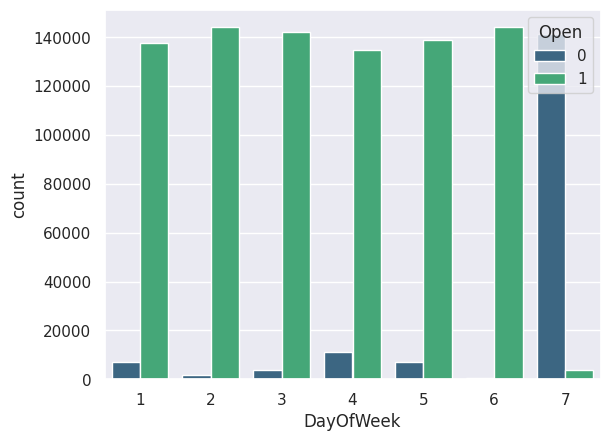

In [ ]:
sns.countplot(x='DayOfWeek',hue='Open',data=store_train, palette='viridis')

->we can see stores is closed on sunday(7) most of the time.

In [ ]:
# Value Counts of SchoolHoliday Column
store_train.SchoolHoliday.value_counts(normalize=True)

0    0.821353
1    0.178647
Name: SchoolHoliday, dtype: float64

->we can see that 18 % is state holiday.

***Q.In School Holiday sales is  affected  or not ?***

---



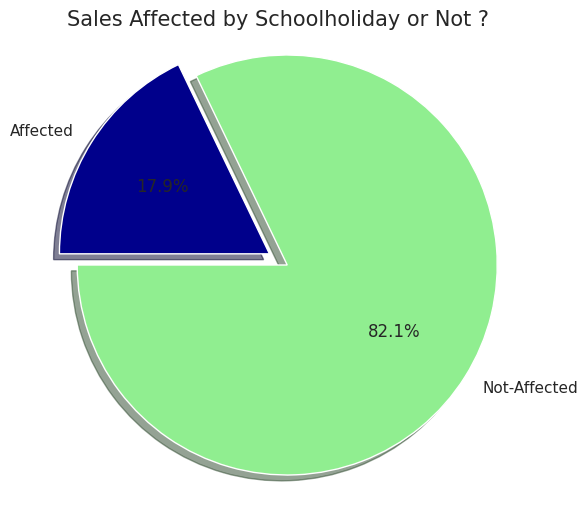

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = store_train.SchoolHoliday.value_counts()
colors = ['lightgreen','darkblue']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=15)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

->As we can see in the Piechart  Sales aren't afffected by School Holiday

-> Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

***Q.In School Holidays Store sales are affected or not?***

---

 a = public holiday, b = Easter holiday, c = Christmas, 0 = None.
 
  a==1,b==2,c==3,0==0

<Axes: xlabel='StateHoliday', ylabel='Sales'>

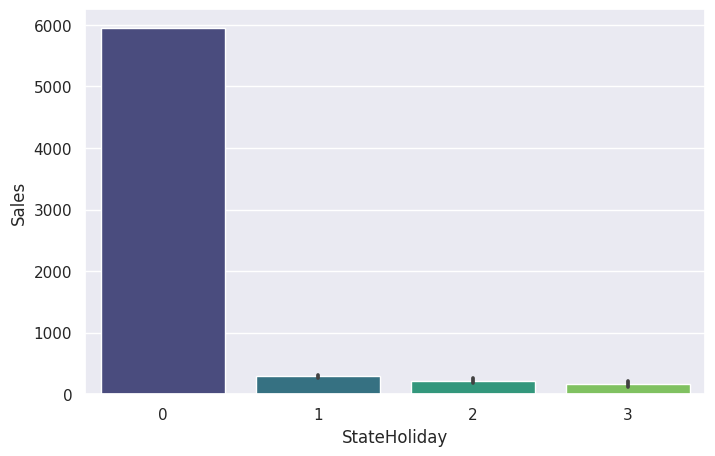

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="StateHoliday", y="Sales", data=store_train,palette='viridis')

->Not all store are closed in State Holidays , We see in our plot  3 that means in c (christmas) most of the store closed so it affected most in sales as compare to A (1) and B(2)

***Q.After promation sales Inscrease  or not?***

---

<Axes: xlabel='Promo', ylabel='Sales'>

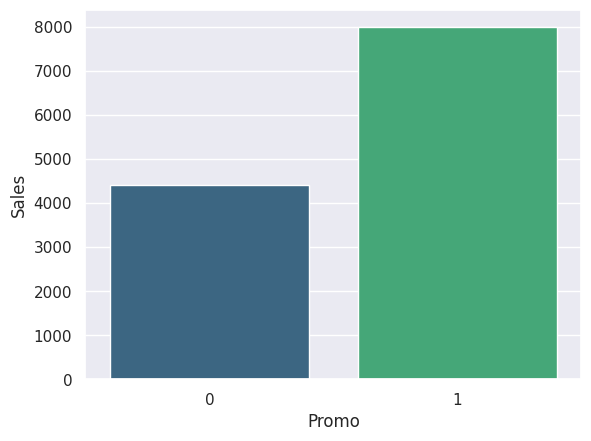

In [ ]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(store_train.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'], palette='viridis')

->Sales Are nearly doubled High When Promo is Running

->Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

***Q.Incrementation in Day of week after promoton?***

---

1=promo 0=not promo

Text(0.5, 1.0, 'Store Daily Promo Countplot')

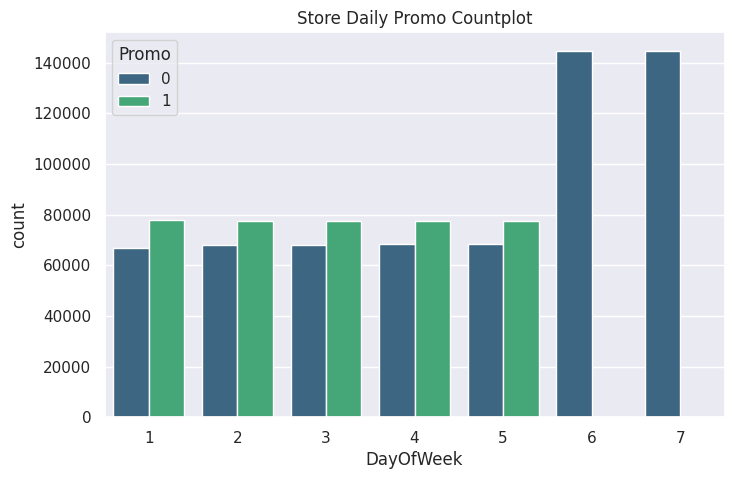

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= store_train, palette='viridis')
plt.title('Store Daily Promo Countplot')

->We can observed that promotion in  every week equal accept 6,7 .In this 2 days no promotion in the store.

***Q.Which year has highest open?***

---

0 = closed, 1 = open

<Axes: xlabel='Year', ylabel='count'>

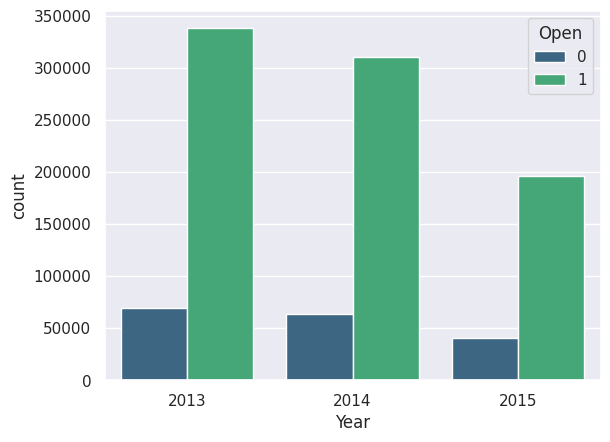

In [ ]:
sns.countplot(x='Year',hue='Open',data=store_train, palette='viridis')

->2013 highest open  also 2013 is most closed.

->2015 less open.


***Q.Which month has highest sales?***

---



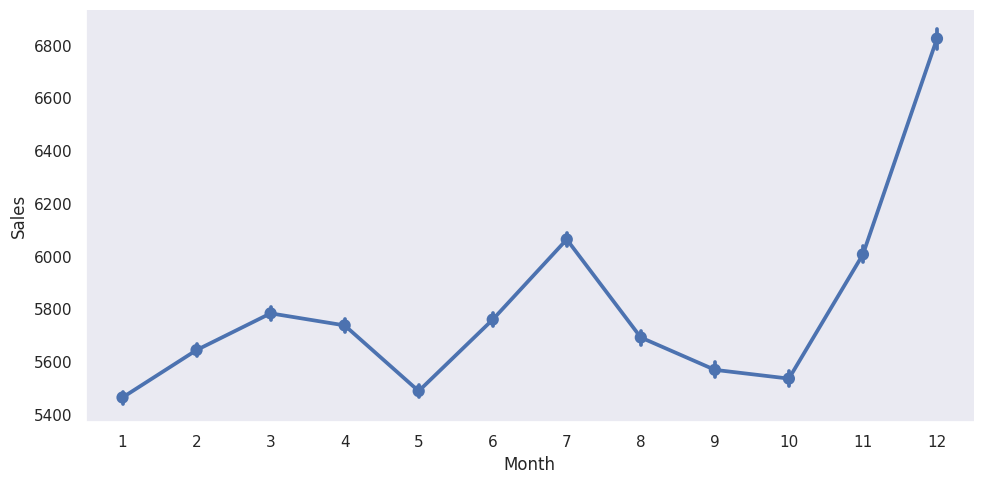

In [ ]:
sns.catplot(x="Month" ,y = "Sales" , data=store_train, kind="point", aspect=2,height=5)

->As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.

***Q.Which date has highest sales?***

---



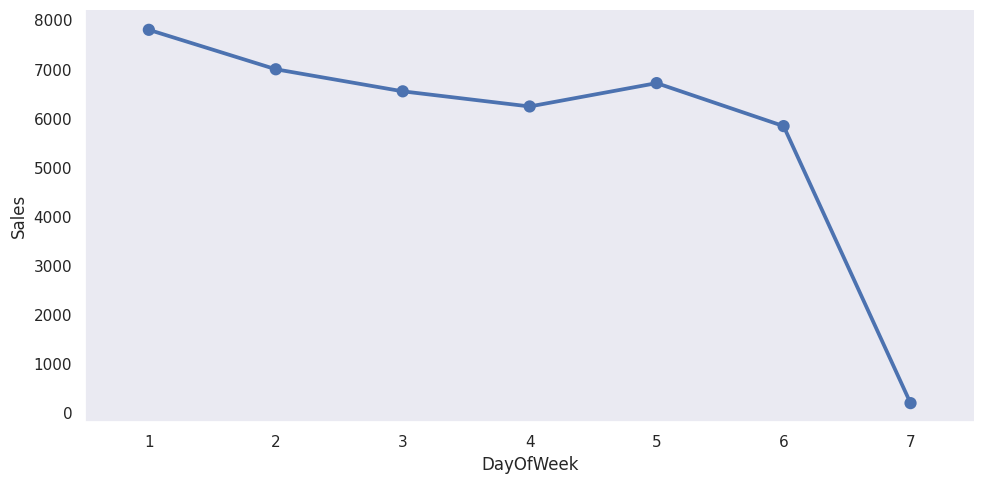

In [ ]:
sns.catplot(x="DayOfWeek" ,y = "Sales" , data=store_train, kind="point", aspect=2,height=5)


->From this graph we get insights that Maximum Sales is on Day 1 which is Monday and the same is decreasing till Day 6 which is Saturday .As most of the stores are closed on Day 7 which is Sunday ,so the Sales is closed to Zero.

###Sales

In [ ]:
store_train["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

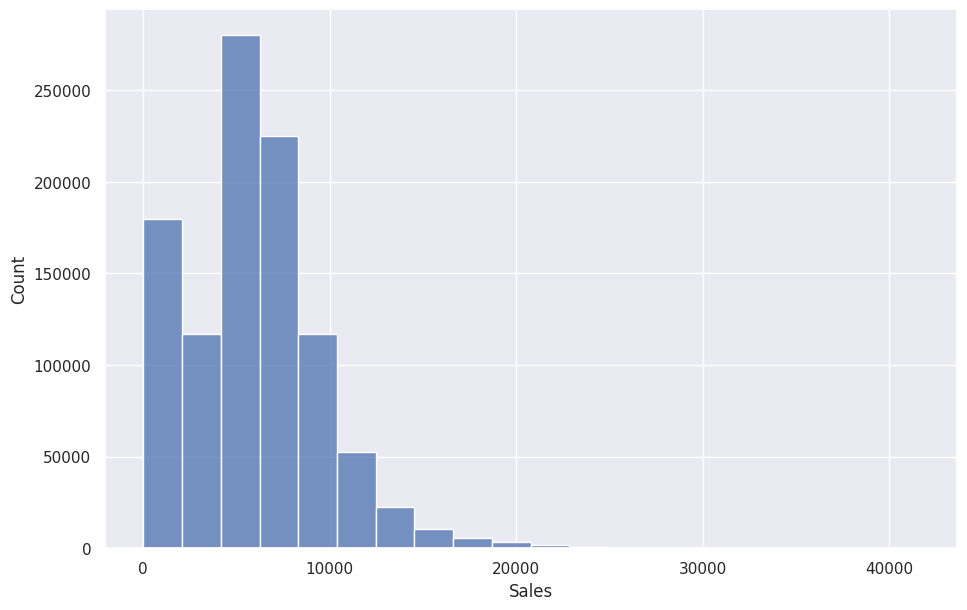

In [15]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.histplot(store_train['Sales'], kde = False,bins=20);


->Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.

***Q.Yearly sales?***

---



<ipython-input-14-cd908df7a228>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='Year',y='Sales',data=store_train, height=4, aspect=4, palette='viridis' )


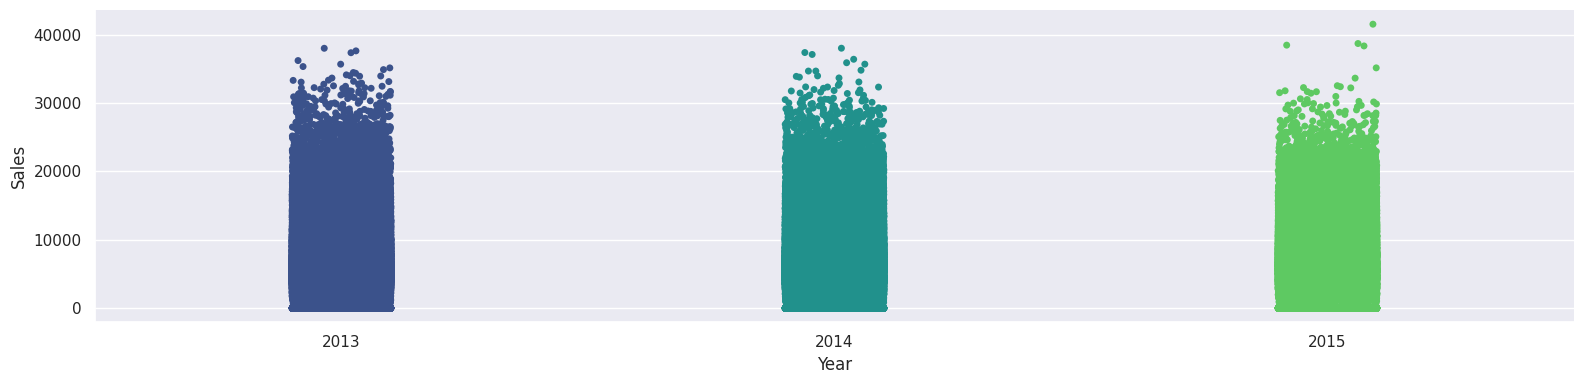

In [14]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=store_train, height=4, aspect=4, palette='viridis' )

->We can see that there is not such significant differences in these 3 years in terms of sales.

***Q.Day wise sales?***

---



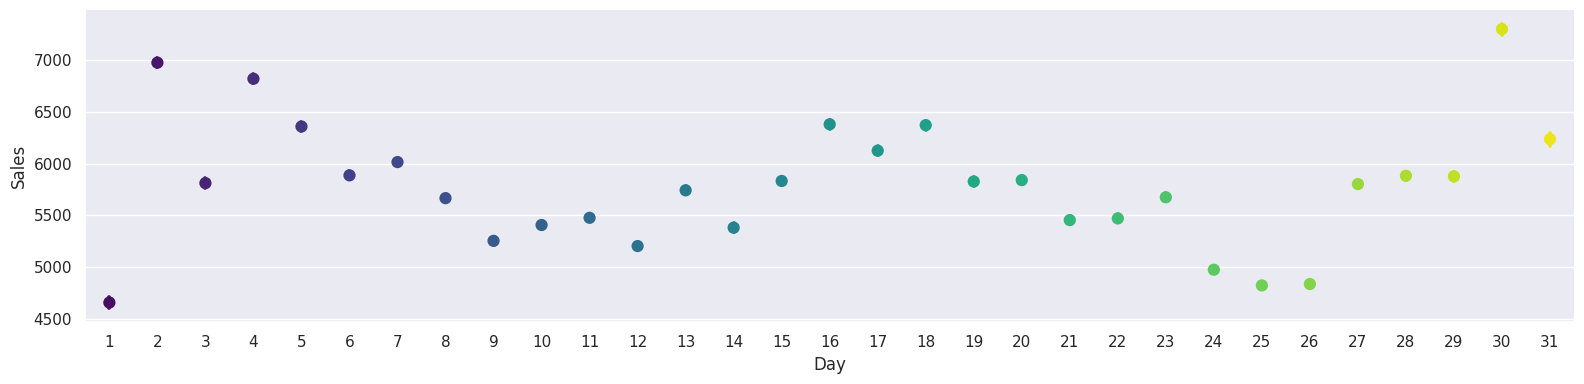

In [16]:
#plotting year vs sales
sns.catplot(x='Day',y='Sales',data=store_train, height=4, aspect=4, palette='viridis' ,kind="point")
# sns.catplot(x="DayOfWeek" ,y = "Sales" , data=store_train, kind="point", aspect=2,height=5)

In [17]:
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


#***Analyze the Store dataset***

###Dataset First View

In [18]:
# Dataset First Look
store_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#tail of the dataset
store_test.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


###Dataset Rows & Columns count

In [ ]:
#rows and columns count
store_test.shape

(1115, 10)

###Dataset Information

In [ ]:
# Dataset Info
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
store_test.duplicated().sum()

0

###Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
store_test.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

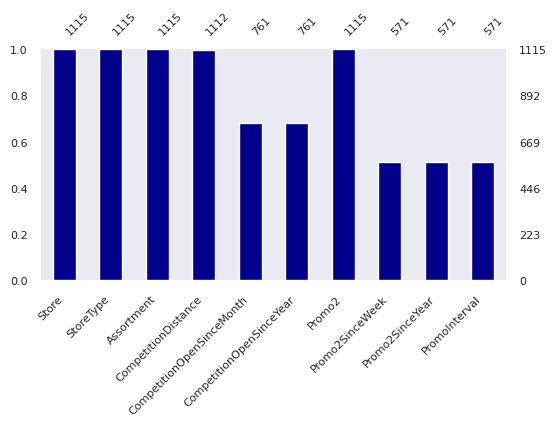

In [ ]:
# Visualizing the missing values
msno.bar(store_test, figsize=(6,3), fontsize=8, color="darkblue")

###What did you know about your dataset?

Answer Here:

->Data set has 1115 rows and 10 columns.

->Almost 6 columns have null value.

->Dataset has 5 float type columns, 2 object types columns and  3 object types columns.

->Need to convert some float to int for accurat observation.

->4 columns  of the dataset which hasn't any null values.


##**2.Understanding Your Variables**

In [ ]:
# Dataset Describe
store_test.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


###Variables Description

Answer Here

**Store**- Index value .

**StoreType** - differentiates between 4 different store models: a, b, c, d.

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended.
3 unique value a,c,b and nan value is 0.

**CompetitionDistance** - distance in meters to the nearest competitor store.


**CompetitionOpenSince[Month/Year]**- gives the approximate year and month of the time the nearest competitor was opened.

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.


**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2.

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.
It has some group of month .

###Check Unique Values for each variable.

In [ ]:
#Check Unique Values for each variable.
store_test.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [ ]:
store_test.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
store_test.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

In [ ]:
store_test.CompetitionDistance.unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [ ]:
store_test.CompetitionOpenSinceMonth .unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [ ]:
store_test.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [ ]:
store_test.Promo2.unique()

array([0, 1])

In [25]:
store_test.Promo2SinceWeek  .unique()

array([ 0., 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [ ]:
store_test.Promo2SinceYear.unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [ ]:
store_test.PromoInterval  .unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###Replace nan to 0

In [19]:
store_test=store_test.fillna(0)

In [20]:
store_test.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

###Converting float to int

In [75]:
# code for change float into integer 
store_test['CompetitionOpenSinceYear']= store_test['CompetitionOpenSinceYear'].astype(int)
store_test['Promo2SinceYear']= store_test['Promo2SinceYear'].astype(int)

In [76]:
# code for change float into integer 
store_test['CompetitionDistance']= store_test['CompetitionDistance'].astype(int)
store_test['Promo2SinceWeek']= store_test['Promo2SinceWeek'].astype(int)

In [77]:
# code for change object into date format
store_test['CompetitionOpenSinceMonth'] = store_test['CompetitionOpenSinceMonth'] .astype(int)

###Converting object to int

In [78]:
# change Data Types object into int 
store_test.loc[store_test['StoreType'] == 'a', 'StoreType'] = 0
store_test.loc[store_test['StoreType'] == 'b', 'StoreType'] = 1
store_test.loc[store_test['StoreType'] == 'c', 'StoreType'] = 2
store_test.loc[store_test['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
store_test['StoreType'] = store_test['StoreType'].astype(int, copy=False)

In [79]:
# change Data Types object into int 
store_test.loc[store_test['Assortment'] == 'a', 'Assortment'] = 0
store_test.loc[store_test['Assortment'] == 'b', 'Assortment'] = 1
store_test.loc[store_test['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
store_test['Assortment'] = store_test['Assortment'].astype(int, copy=False)

In [80]:
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Store                      1115 non-null   int64 
 1   StoreType                  1115 non-null   int64 
 2   Assortment                 1115 non-null   int64 
 3   CompetitionDistance        1115 non-null   int64 
 4   CompetitionOpenSinceMonth  1115 non-null   int64 
 5   CompetitionOpenSinceYear   1115 non-null   int64 
 6   Promo2                     1115 non-null   int64 
 7   Promo2SinceWeek            1115 non-null   int64 
 8   Promo2SinceYear            1115 non-null   int64 
 9   PromoInterval              1115 non-null   object
dtypes: int64(9), object(1)
memory usage: 87.2+ KB


In [81]:
store_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270,9,2008,0,0,0,0
1,2,0,0,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,0,0,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,2,2,620,9,2009,0,0,0,0
4,5,0,0,29910,4,2015,0,0,0,0


###Cleaning

In [82]:
# remove features
store_test = store_test.drop([ 'PromoInterval'], axis=1)

->PromoInterval has some group of month and it is used in our dataset so remove this varibale.

##**3.Eda on store Dataset**

***Q.Distribution Of Different Store Types***

---



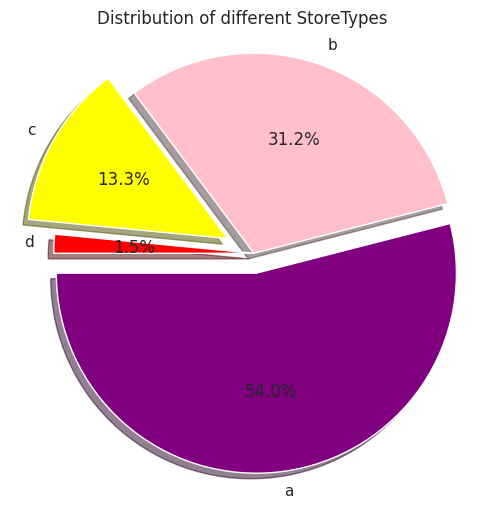

In [31]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_test.StoreType.value_counts()
colors = ['purple', 'pink' , 'yellow' , 'red']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

***Q.Checking stores with their assortment type***

---





0=a, 1=b 2=c

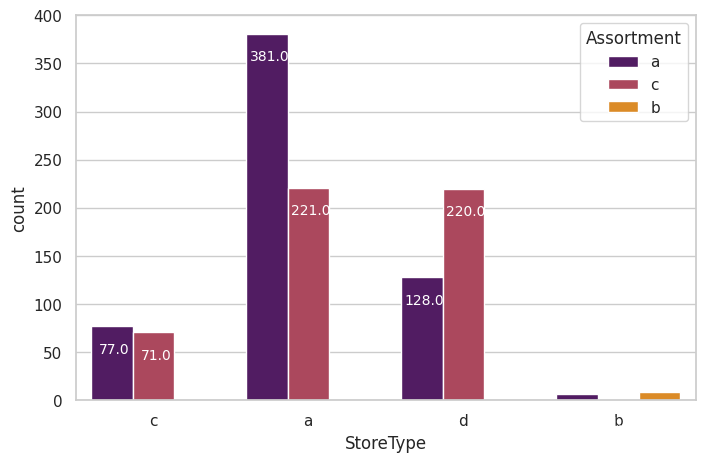

In [21]:
#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_test,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

## **4.Data Wrangling**

### Data Wrangling Code

In [35]:
# Write your code to make your dataset analysis ready.
# #check outliers
# store_test.describe()

->see some outliers in compitiors distance

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

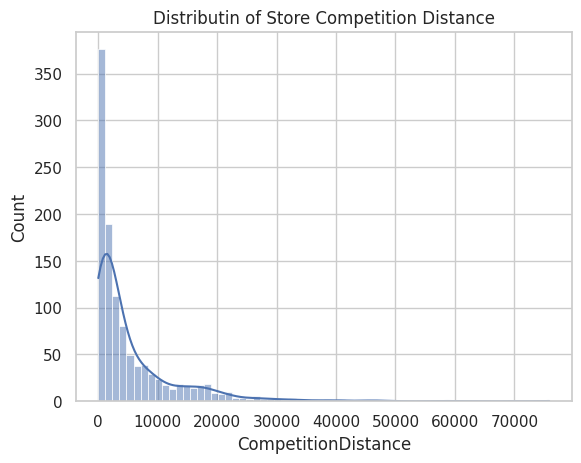

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.histplot(store_test['CompetitionDistance'],kde=True)
plt.title("Distributin of Store Competition Distance")

In [ ]:
store_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01


### What all manipulations have you done and insights you found?

Answer Here.



 Remove all null value with 0

Check for duplicate value

covert some float value to int 

check outlier ,and find compititionDisatnce has outlier and remove outlier

our data is now clean












In [ ]:
store_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,2,0,1270,9,2008,0,0,0
1,2,0,0,570,11,2007,1,13,2010
2,3,0,0,14130,12,2006,1,14,2011
3,4,2,2,620,9,2009,0,0,0
4,5,0,0,29910,4,2015,0,0,0


In [ ]:
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


#**Merge two dataset**

In [33]:
store = pd.merge(store_train, store_test, how='left', on='Store')
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Weekof year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
store.shape

(1017209, 21)

###Cleaning

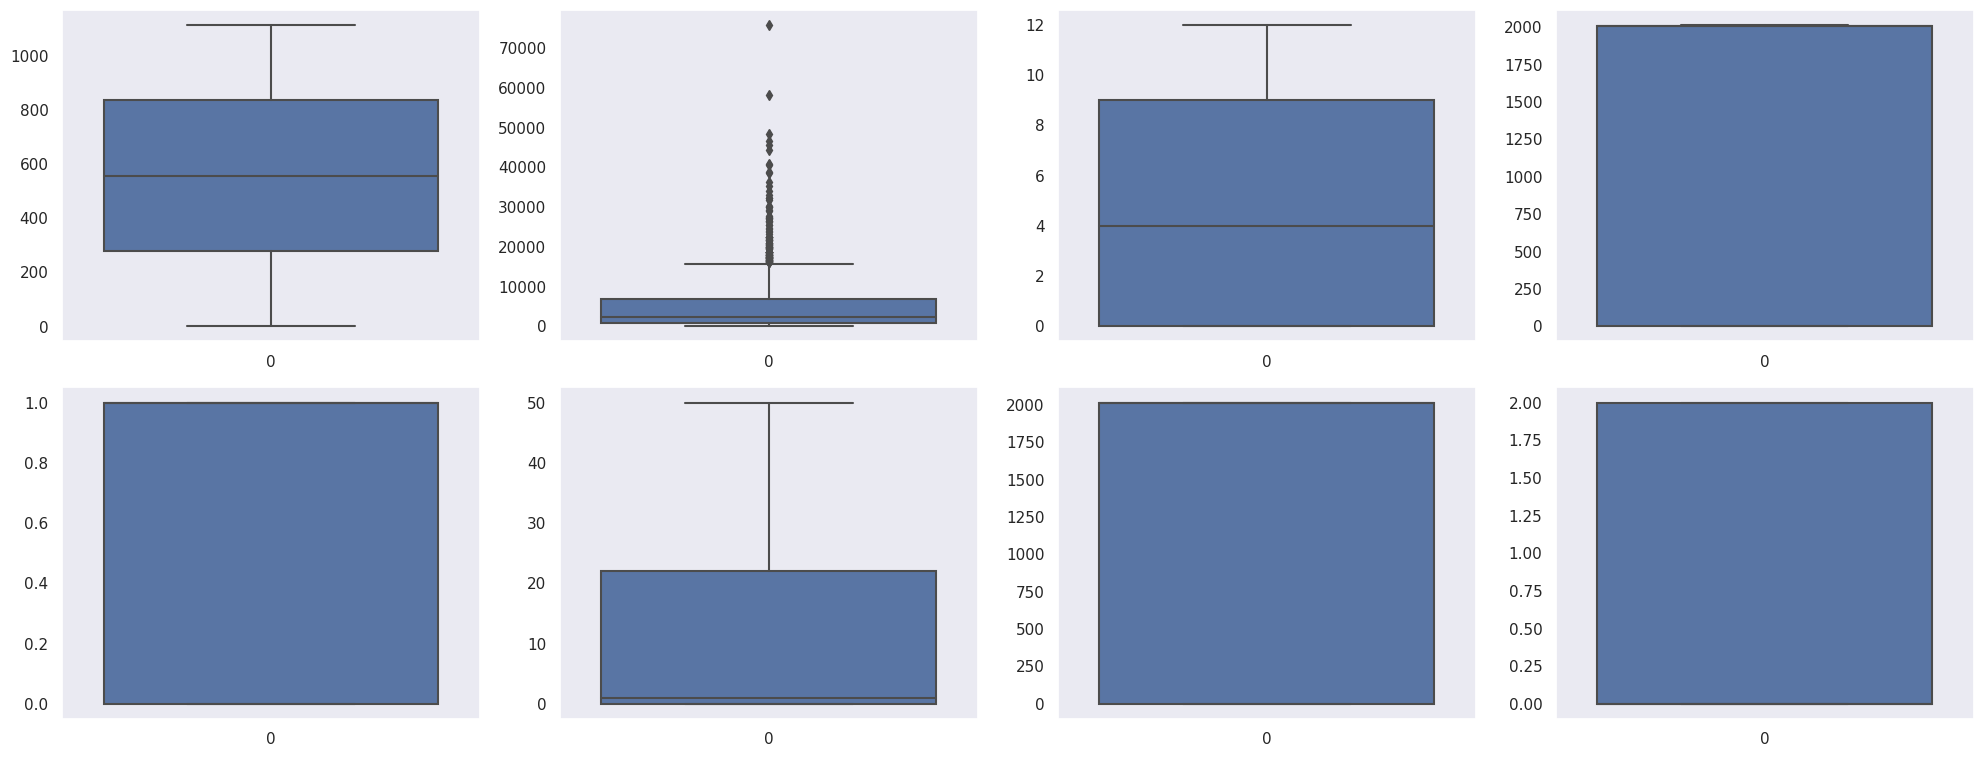

In [93]:
#Check outlier 
columns = ['Store',	'CompetitionDistance',	'CompetitionOpenSinceMonth'	,'CompetitionOpenSinceYear'	,'Promo2','Promo2SinceWeek','Promo2SinceYear','Assortment']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(store_test[column])
  plt.tight_layout()

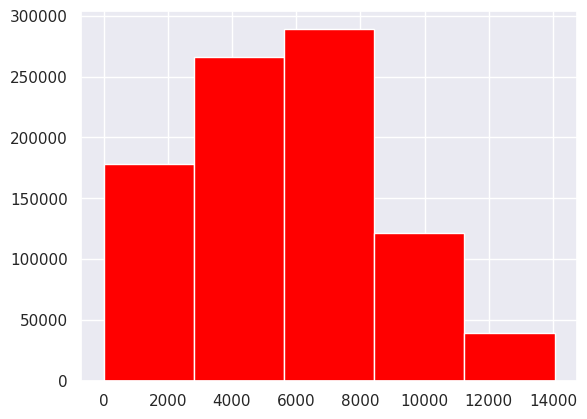

In [89]:
pd.Series(store['Sales'],).hist(bins=5, color="red")
plt.show()

->Box plot shows that we have a very high outliers in sales

->So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.

In [90]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [91]:
# defining new variable after removing outliers
store= remove_outlier(store, 'Sales')

In [92]:
# defining new variable after removing outliers
store= remove_outlier(store, 'CompetitionDistance')

>Removing Outliers Column

#**Eda on Merge dataset**

##***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-Heat Map

In [ ]:
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Day,Weekof year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,31,2,0,1270,9,2008,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,31,0,0,570,11,2007,1,13,2010
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,31,0,0,14130,12,2006,1,14,2011
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,31,2,2,620,9,2009,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,31,0,0,29910,4,2015,0,0,0


<ipython-input-40-682a66fc8afa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = store.corr()


<Axes: >

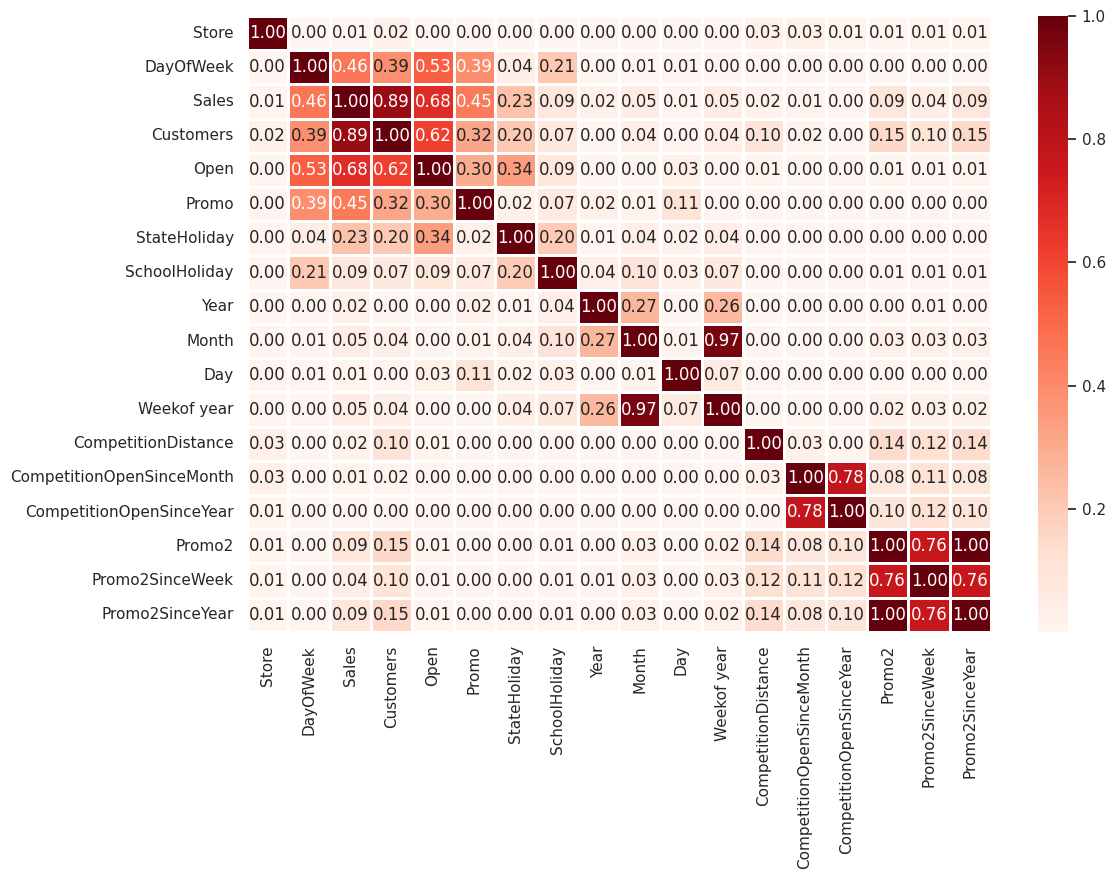

In [40]:
plt.figure(figsize=(12,8))
correlation = store.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")


->The color of the cell indicates the direction and strength of the correlation: a positive correlation is indicated by a warm color (such as Red) and a negative correlation is indicated by a cool color (such as Orange).The intensity of the color represents the strength of the correlation.



###Point Plot

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

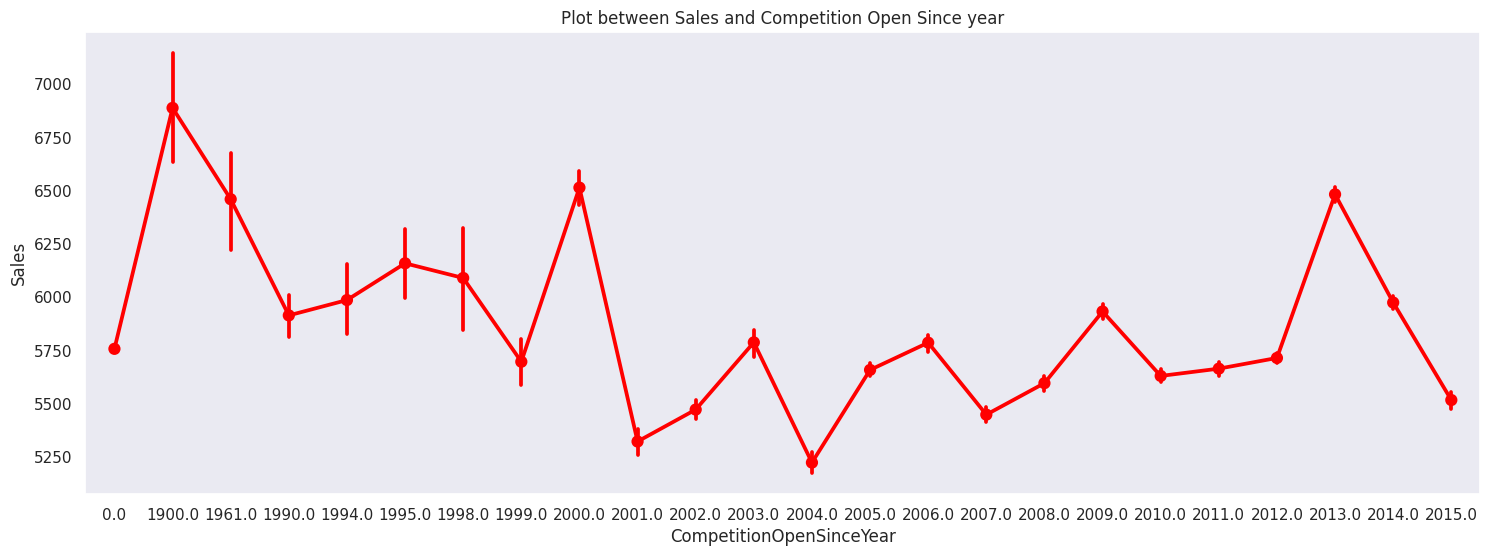

In [45]:
plt.figure(figsize=(18,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=store,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

->From this chart we get insights that Sales is Highest During the Year 1900 because for that time there are limited number of Stores ,hence the competition is very low. But as year pass,no of stores get increased that means Competition also increased accordignly ,hence Sales got Decline year by year.

Text(0.5, 1.0, 'Plot between Sales and Promo2SinceYear')

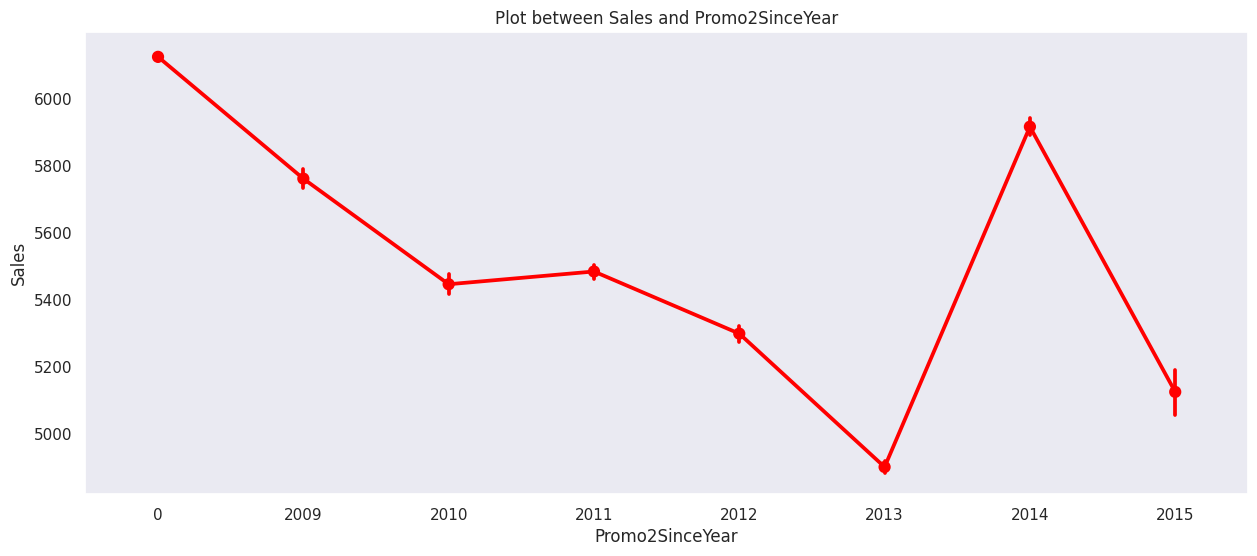

In [ ]:
plt.figure(figsize=(10,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=store,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Promo2SinceYear')


->From This Graph We saw that sales of stores is effected which continues their promotion.The Sales in 2013 and 2015 are very low inspite of promotion.The reason can be more competiton year by year.

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

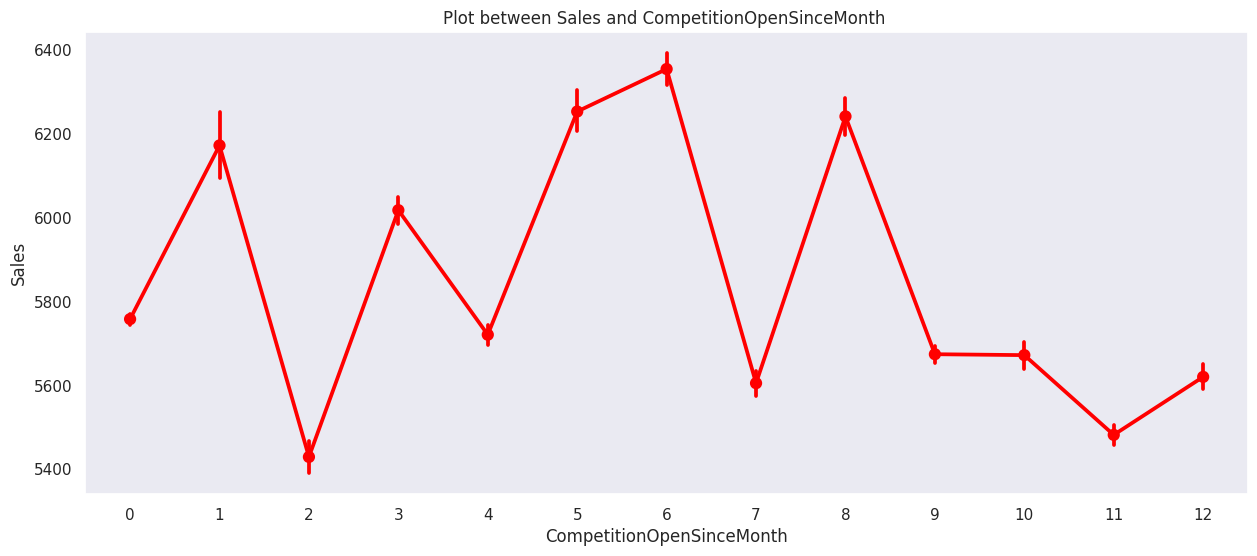

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=store,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

->From This Graph We saw that sales of stores is effected which continues their promotion.The Sales in feb and nov month  are very low inspite of promotion.The reason can be more competiton per month.

###Box plot

Text(0.5, 1.0, 'Boxplot For Sales Values')

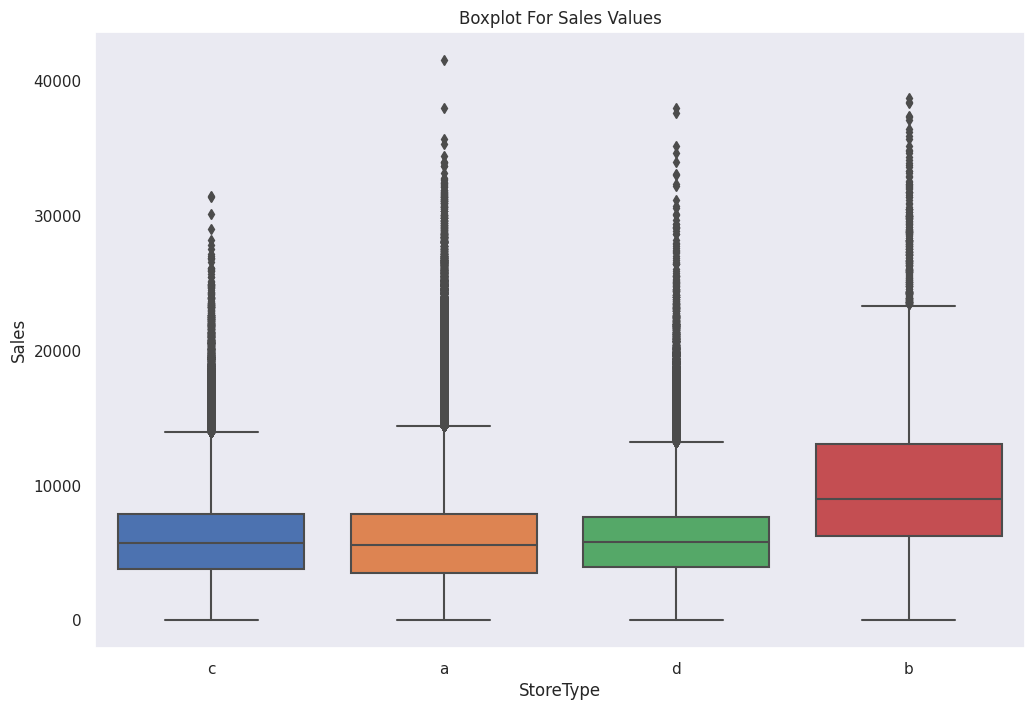

In [43]:
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=store, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment')

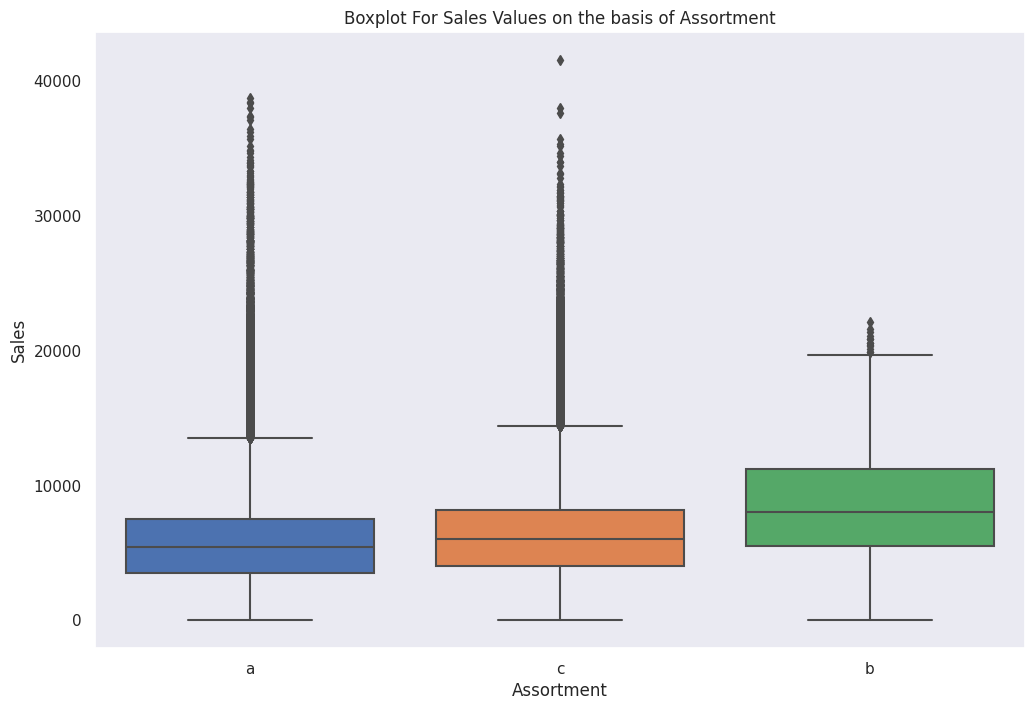

In [46]:
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=store, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values on the basis of Assortment')

#### Chart - 2

In [47]:
# Chart - 2 visualization code
store["Avg_Customer_Sales"] = store.Sales/store.Customers

####Total and avg on Store types

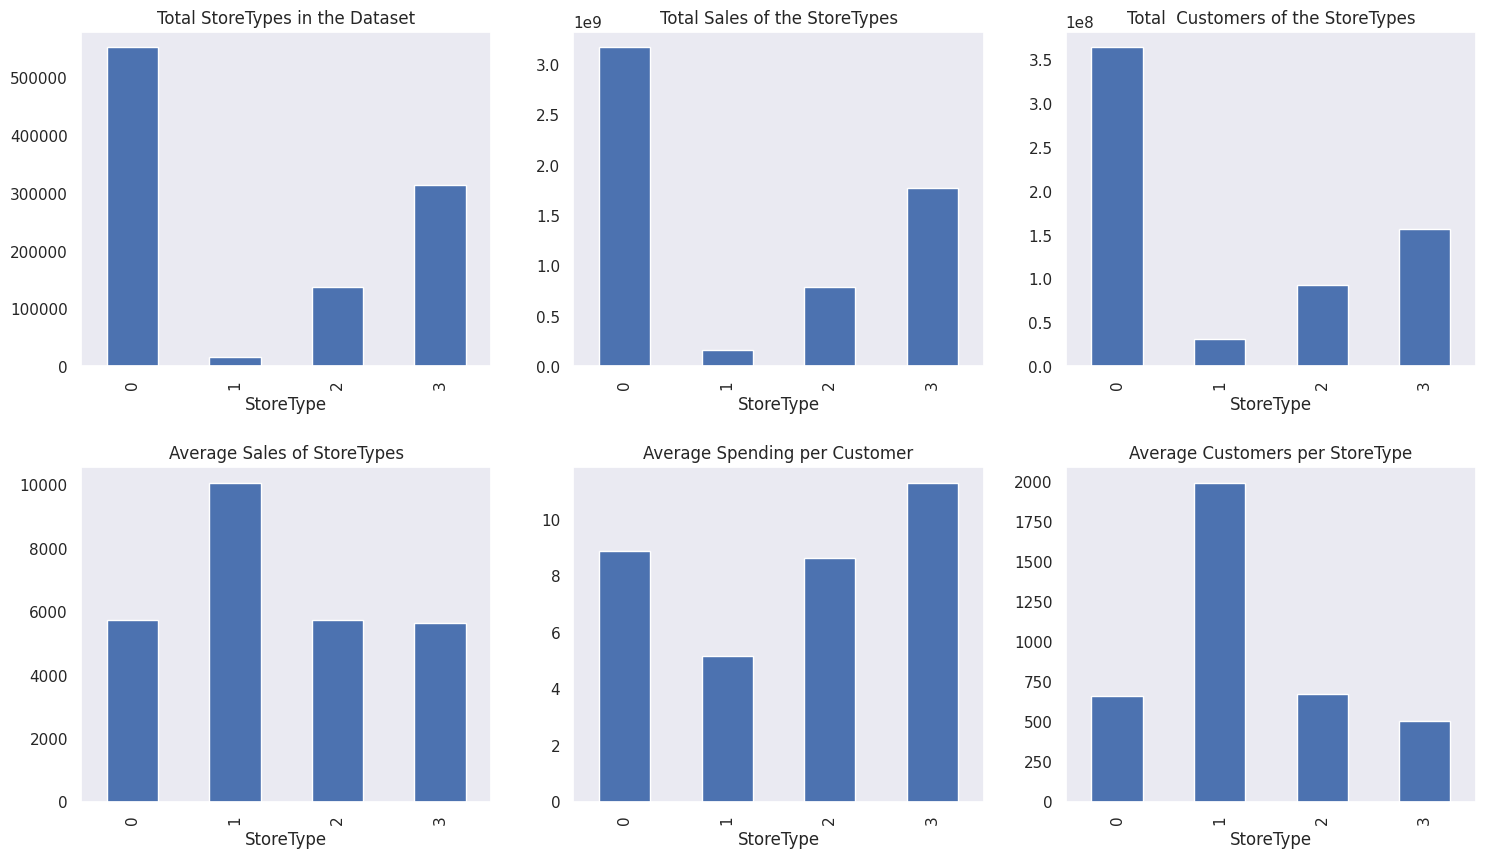

In [ ]:
f, ax = plt.subplots(2, 3, figsize = (18,10))

store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")

store.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total  Customers of the StoreTypes")
store.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")
store.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")


store.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
store.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")

plt.subplots_adjust(hspace = 0.3)
plt.show()

As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.

#### Chart - 3

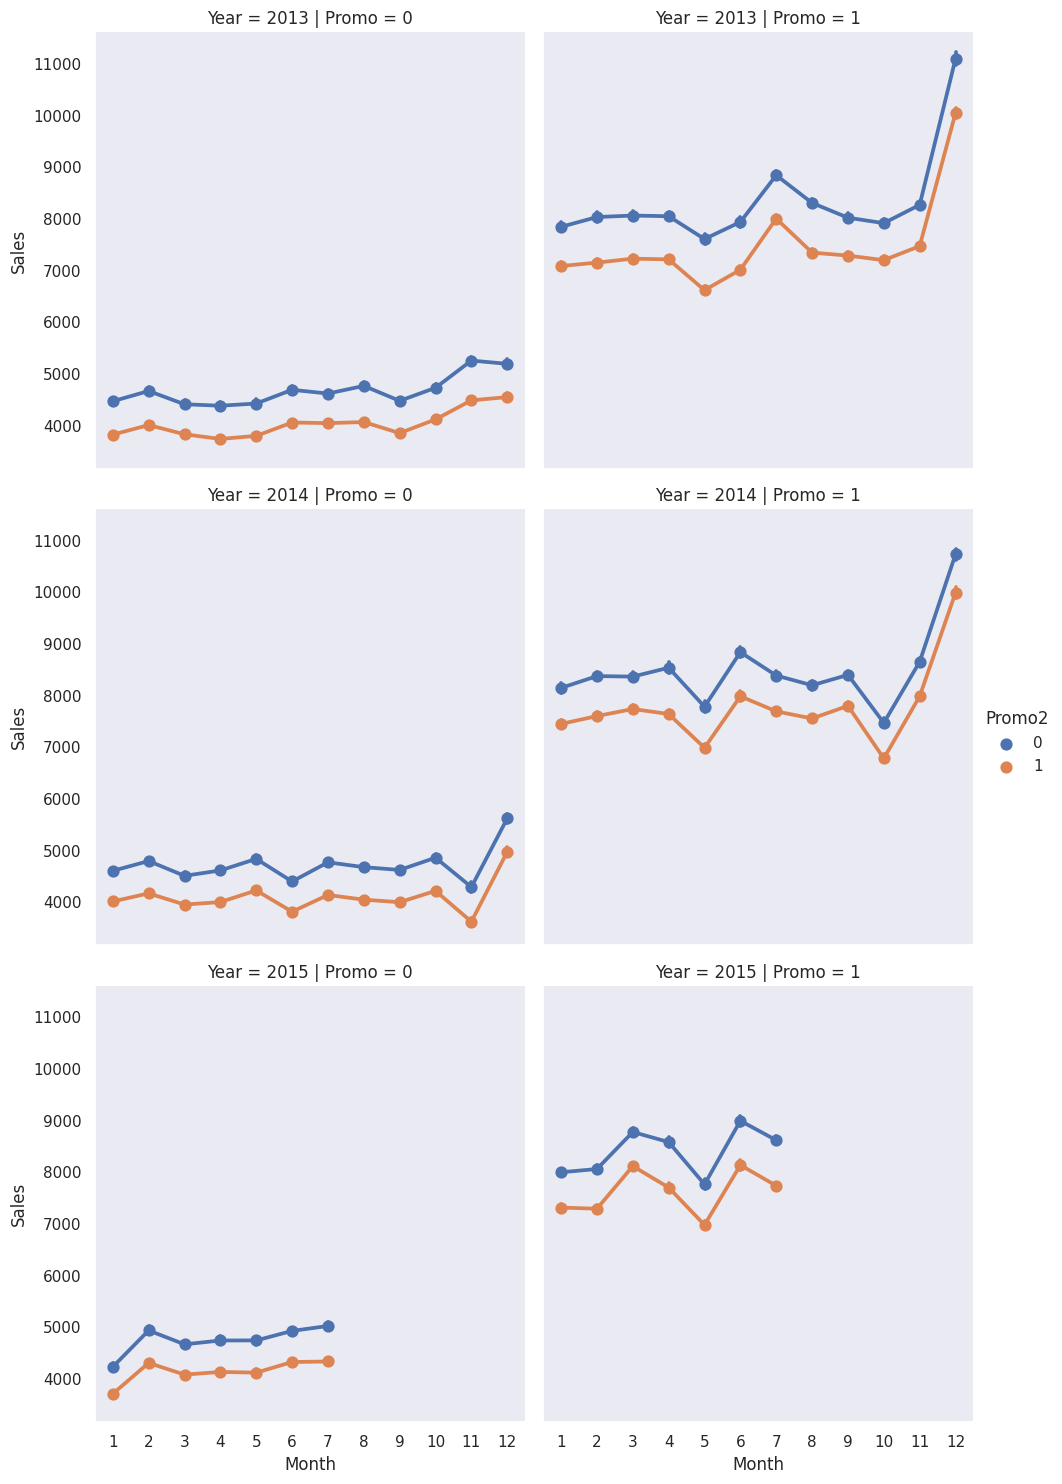

In [56]:
# Chart - 3 visualization code
sns.catplot(data = store, x ="Month", y = "Sales", col = 'Promo', hue = 'Promo2',row = "Year",kind="point" )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 


->As We can see that when the promo is running Sales are high

#### Chart - 4

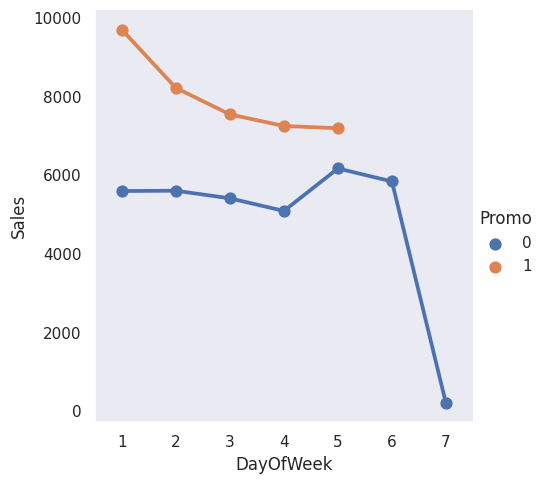

In [54]:
# # Chart - 4 visualization code
# sns.catplot(data = store, x = "DayOfWeek", y = "Sales", hue = "Promo")
sns.catplot(data = store, x = "DayOfWeek", y = "Sales", hue = "Promo",kind="point")
# sns.catplot(x="DayOfWeek" ,y = "Sales" , data=store_train, kind="point", aspect=2,height=5)


#### Chart - 5

In [57]:
# Chart - 6 visualization code
#What about the Competition Distance. What kind of inpact does this have on the sales.
store.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
store["CompetitionDistance_Cat"] = pd.cut(store["CompetitionDistance"], 5)

#### Chart - 7

<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

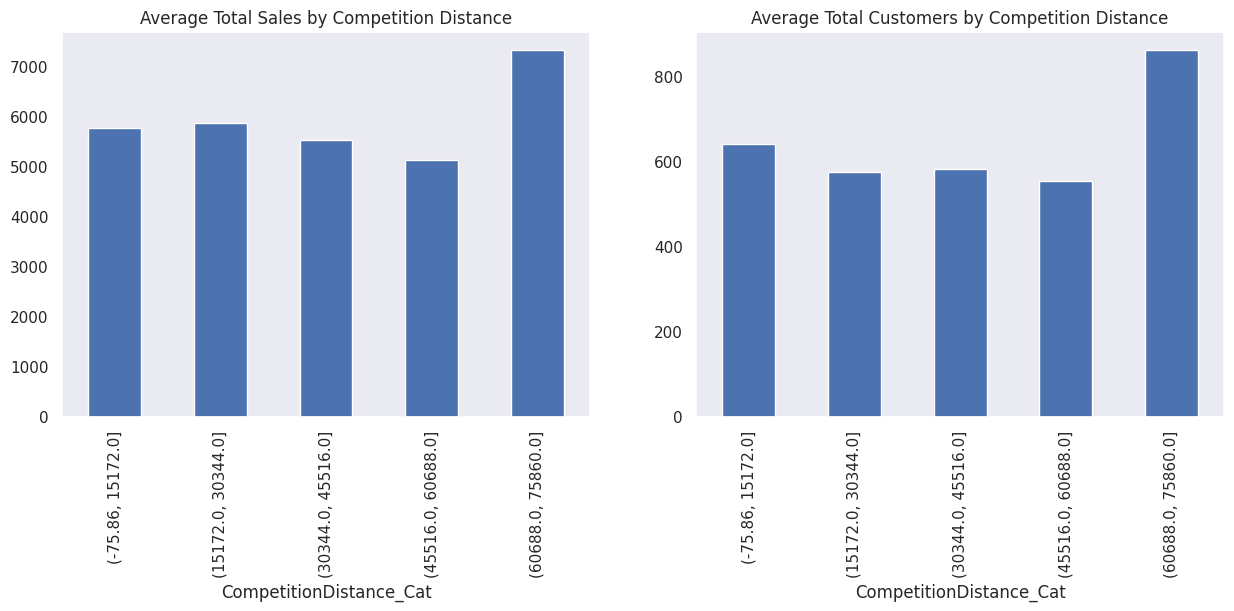

In [58]:
# Chart - 7 visualization code
f, ax = plt.subplots(1,2, figsize = (15,5))

store.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
store.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [ ]:
store.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

####Drop Subsets Of Data Where Might Cause Bias

In [ ]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
store = store[store.Open != 0]

In [ ]:
# Open isn't a variable anymore, so we'll drop it too
store = store.drop('Open', axis=1)

In [ ]:
# Check if there's any opened store with zero sales
store[store.Sales == 0]['Store'].sum()

31460

In [ ]:
# see the percentage of open stored with zero sales
store[store.Sales == 0]['Sales'].sum()/store.Sales.sum()

0.0

So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.

In [ ]:
# remove this part of data to avoid bias
store = store[store.Sales != 0]

In [ ]:
store.shape

(817644, 20)

In [ ]:
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,2,0,1270,9,2008,0,0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,0,0,570,11,2007,1,13,2010
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,0,0,14130,12,2006,1,14,2011
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31,2,2,620,9,2009,0,0,0
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31,0,0,29910,4,2015,0,0,0


**In new_df dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).**

In [ ]:
store.to_csv('cleandata.csv', index=False)

#Model

## **5-Hypothesis Testing**

##**Hypothetical Statement - 1**
#### **MODEL 1 (excluding rows which has sales =0)**


As we have two dataset,first one having sales = '0' rows and another exculding it. We will both the data and find the best model.

**First We will take dataset excluding Sales = '0' rows.**

##**Hypothetical Statement - 2**

####**MODEL 2 (By taking whole Dataset)**

#**7-ML Model Implementation**

### **MODEL TRAINING**

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

# **MODEL 1 (excluding rows which has sales =0)**


As we have two dataset,first one having sales = '0' rows and another exculding it. We will both the data and find the best model.

**First We will take dataset excluding Sales = '0' rows.**

###Setting Features and Target Variables

In [ ]:
# defining dependent variable
dependent_variables = 'Sales'

In [ ]:
# defining independent variable
independent_variables = list(store.columns.drop(['Promo2SinceYear','Date','Sales','Store','Year']))

In [ ]:
#List of Independent Variable 
independent_variables


['DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Month',
 'Day',
 'Weekof year',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek']

In [ ]:
# Create the data of independent variables
X = store[independent_variables].values

In [ ]:
# Create the data of dependent variable
y = store[dependent_variables].values

In [ ]:
X.shape

(817644, 15)

####Splitting Dataset Into Training Set and Test Set

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(654115, 15)
(163529, 15)


####Implementing Supervised Machine Learning algorithms.

1. Linear Regression (OLS)

In [ ]:
# Here we Train the model 
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#Checking the Regression Score i.e R-squared value
reg.score(X_train, y_train)

0.7073225723468299

In [ ]:
# Checking the cofficient of different independent columns
reg.coef_

array([-4.42054918e+01,  6.07096317e+00,  1.23542829e+03, -1.11878873e+03,
        3.17628393e+01,  3.43038113e+01,  7.18264412e-01, -2.76616201e+00,
        2.69990267e+02,  1.87321778e+02,  2.73381391e-02, -1.08724947e+00,
        6.70327320e-02, -3.82197477e+01,  1.21088104e+01])

In [ ]:
# Checking the intercept of different indpendent columns
reg.intercept_

835.2814230168124

In [ ]:
# y_pred_train = regressor.predict(X_train)
#Predicting Dependent Variable With Test Dataset i.e 30%
y_pred = reg.predict(X_test)
y_pred

array([7277.9985441 , 6648.77047944, 7589.1705861 , ..., 6563.68951628,
       7816.66493837, 7820.53699384])

In [ ]:
# # Predicting the Test set results
# y_pred = regressor.predict(X_test)

In [ ]:
# Original Test Dependent Value
y_test

array([8746, 5819, 8977, ..., 7409, 9865, 8303])

In [ ]:
#Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train

array([ 5779.61610768, 10473.19379038,  5415.27876605, ...,
        5565.4254828 ,  5559.54860947,  5365.9432622 ])

In [ ]:
# Dependent Variable With Train Dataset i.e 70 %
y_train

array([ 6449, 10498,  4910, ...,  3739,  6973,  2926])

In [ ]:
#Calculate MSE & RMSE for Test Prediction
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1776437.2018506788
RMSE : 1332.8305225536662


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.7090731624747013


In [ ]:
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])

,actual,pred
0,8746,7277.998544
1,5819,6648.770479
2,8977,7589.170586
3,4950,3746.107447
4,8234,6147.981585
...,...,...
163524,6867,8092.725145
163525,3893,4331.781413
163526,7409,6563.689516
163527,9865,7816.664938


In [ ]:
# !pip install shap


In [ ]:
# pip install lime

#SHAP and LIME

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

In [ ]:
# load the Rossman dataset
data = pd.read_csv("/content/cleandata.csv", low_memory=False)

# convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# extract year, month, and day of week from 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [ ]:
# select relevant features
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month','Assortment']

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


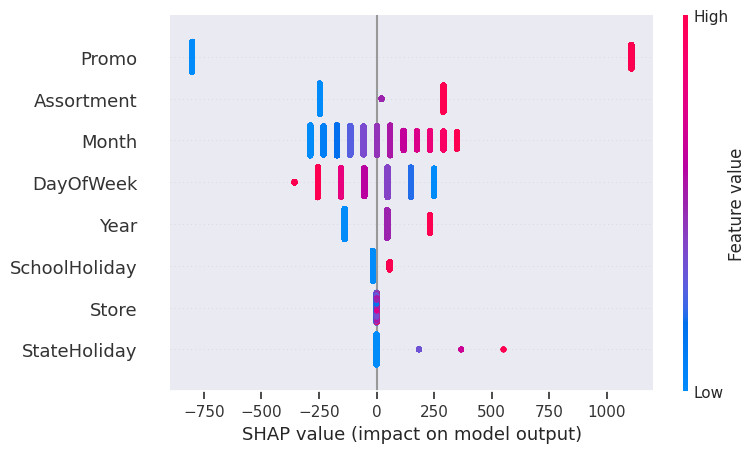

[('2013.00 < Year <= 2014.00', 236087.92751301263), ('SchoolHoliday <= 0.00', -11732.786003462697), ('0.00 < Promo <= 1.00', 7759.078905147585), ('Assortment <= 0.00', -7316.831357698136)]


X does not have valid feature names, but LinearRegression was fitted with feature names


In [ ]:
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['Sales'], test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# create a SHAP explainer object
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

# calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# plot the SHAP values for the first feature of the first test instance
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Sales'], mode='regression')

# explain the prediction for the first test instance using LIME
exp = explainer.explain_instance(X_test.values[0], model.predict, num_features=4)

# print the LIME explanation
print(exp.as_list())


####SHAP:- SHapley Additive exPlanations

####LIME:- Local Interpretable Model-Agnostic Explanations

SHAP values are a way of explaining the output of a machine learning model by calculating the contribution of each feature to the predicted output.

LIME is another technique for explaining the output of a machine learning model by approximating the model's behavior locally around the instance

#LASSO

In [ ]:
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter=10000,selection='cyclic', tol=0.0001,)

In [ ]:
L1.fit(X_train, y_train)

Lasso(alpha=0.4, max_iter=10000)

In [ ]:
y_pred_lasso = L1.predict(X_test)

In [ ]:
L1.score(X_test, y_test)

0.18402577804334108

In [ ]:
cv_scores = cross_val_score(L1, X, y, cv=10)
mean_cv_score = cv_scores.mean()

In [ ]:
cv_scores

array([0.67009043, 0.69356477, 0.69458268, 0.71116417, 0.70166561,
       0.71374753, 0.70277684, 0.7056348 , 0.6962264 , 0.73025195])

In [ ]:
mean_cv_score

0.7019705177839424

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
lasso_cv = GridSearchCV(L1, parameters, cv=5)
lasso_cv.fit(X, y)


GridSearchCV(cv=5, estimator=Lasso(alpha=0.4, max_iter=10000),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [ ]:
# extract the best alpha value and corresponding score
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso= lasso_cv.best_score_

In [ ]:
best_alpha_lasso

0.3

In [ ]:
best_score_lasso

0.7034814663360278

In [ ]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,5541,7586.175541
1,4657,5625.348904
2,2350,5814.790085
3,2554,5859.540742
4,12813,5320.726636
...,...,...
163524,8455,5683.606948
163525,6404,5120.212037
163526,5708,5493.533509
163527,6561,5338.101757


##Ridge

In [ ]:
L2 = Ridge(alpha = 0.5)

In [ ]:
L2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
L2.predict(X_test)

array([7586.23153014, 5624.61504205, 5815.20157828, ..., 5492.28182578,
       5335.80153524, 5909.2377981 ])

In [ ]:
L2.score(X_test, y_test)

0.18402788021039984

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

ridge = Ridge(max_iter=10000, solver='auto')

# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
ridge_cv = GridSearchCV(L2, parameters, cv=5)
ridge_cv.fit(X, y)

# extract the best alpha value and corresponding score
best_alpha = ridge_cv.best_params_['alpha']
best_score = ridge_cv.best_score_

# perform cross-validation with the best alpha value
ridge_best = Ridge(alpha=best_alpha, max_iter=10000, solver='auto')
cv_scores = cross_val_score(ridge_best, X, y, cv=5)

# find the maximum score and corresponding alpha value
max_score = cv_scores.max()
max_alpha = best_alpha

print("Best alpha value: ", best_alpha)
print("Best score: ", best_score)
print("Maximum CV score: ", max_score)
print("Corresponding alpha value: ", max_alpha)

Best alpha value:  0.5
Best score:  0.7034757371910395
Maximum CV score:  0.7114495171606661
Corresponding alpha value:  0.5


#Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define the Elastic Net model
elastic_net = ElasticNet(max_iter=10000)

# define the range of alpha and l1_ratio values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# perform grid search to find the best alpha and l1_ratio values
elastic_net_cv = GridSearchCV(elastic_net, parameters, cv=5)
elastic_net_cv.fit(X_train, y_train)

# extract the best alpha and l1_ratio values and corresponding score
best_alpha = elastic_net_cv.best_params_['alpha']
best_l1_ratio = elastic_net_cv.best_params_['l1_ratio']
best_score = elastic_net_cv.best_score_

# create an Elastic Net model with the best hyperparameters
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net_best.fit(X_train, y_train)

# evaluate the model on the testing set
test_score = elastic_net_best.score(X_test, y_test)

print("Best alpha value: ", best_alpha)
print("Best l1_ratio value: ", best_l1_ratio)
print("Best score: ", best_score)
print("Test score: ", test_score)


Best alpha value:  0.1
Best l1_ratio value:  0.9
Best score:  0.7069134035949485
Test score:  0.7086318497758853


#Decision Tree

In [ ]:
sales_mean=store[dependent_variables].mean()

In [ ]:
sales_mean

6621.106631981645

In [ ]:
sales_mean_new=store[dependent_variables].mean()

In [ ]:
sales_mean_new

6621.106631981645

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean_new
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 1452940.8728927625
RMSE : 1205.3799703383006
RMPSE : 0.18205113394730812
R2 : 0.7620521047287383


#MODEL 2 (By taking whole Dataset)

In [ ]:
# store = pd.get_dummies(store, columns=['PromoInterval'])

In [ ]:
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,2,0,1270,9,2008,0,0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,0,0,570,11,2007,1,13,2010
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,0,0,14130,12,2006,1,14,2011
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31,2,2,620,9,2009,0,0,0
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31,0,0,29910,4,2015,0,0,0


In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = store.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [ ]:
indep_var

Index(['DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Year', 'Month', 'Day', 'Weekof year', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek'],
      dtype='object')

In [ ]:
# Create the data of independent variables
U = store[indep_var].values
# Create the dependent variable data
V = store[dep_var].values

In [ ]:
V 

array([5263, 6064, 8314, ..., 5035, 4491, 5961])

In [ ]:
U


array([[   5,  555,    1, ..., 2008,    0,    0],
       [   5,  625,    1, ..., 2007,    1,   13],
       [   5,  821,    1, ..., 2006,    1,   14],
       ...,
       [   2, 1248,    0, ...,    0,    1,   48],
       [   2, 1039,    0, ...,    0,    0,    0],
       [   2, 1405,    0, ..., 2002,    0,    0]])

In [ ]:
store[indep_var]

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek
0,5,555,1,0,1,2015,7,31,31,2,0,1270,9,2008,0,0
1,5,625,1,0,1,2015,7,31,31,0,0,570,11,2007,1,13
2,5,821,1,0,1,2015,7,31,31,0,0,14130,12,2006,1,14
3,5,1498,1,0,1,2015,7,31,31,2,2,620,9,2009,0,0
4,5,559,1,0,1,2015,7,31,31,0,0,29910,4,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,2,566,0,1,1,2013,1,1,1,1,0,150,9,2006,0,0
1016827,2,2377,0,1,1,2013,1,1,1,1,1,860,10,1999,0,0
1016863,2,1248,0,1,1,2013,1,1,1,1,1,840,0,0,1,48
1017042,2,1039,0,1,1,2013,1,1,1,1,1,1430,0,0,0,0


In [ ]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(654115, 16)
(163529, 16)


#LINEAR REGRESSION

In [ ]:
# scling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [ ]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [ ]:
v_pred=linear_regression.predict(U_test)
v_pred

array([7347.14355277, 6557.45887286, 7491.31139623, ..., 6612.49075598,
       7898.11268879, 8019.83271015])

In [ ]:
linear_regression.score(U_train, v_train)

0.7099924049402133

In [ ]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,8746,7347.143553
1,5819,6557.458873
2,8977,7491.311396
3,4950,3919.210924
4,8234,6125.438923
...,...,...
163524,6867,8166.919033
163525,3893,4503.764418
163526,7409,6612.490756
163527,9865,7898.112689


In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1760376.3708265352
RMSE : 1326.791758651875
RMPSE : 0.20038821792162811
R2 : 0.7117034422127153


#DECISION TREE

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1452940.8728927625
RMSE : 1205.3799703383006
RMPSE : 0.18205113394730812
R2 : 0.7620521047287383


In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,8746,7885.848815
1,5819,6789.038621
2,8977,7885.848815
3,4950,3855.712553
4,8234,7804.209560
...,...,...
163524,6867,7885.848815
163525,3893,3817.625171
163526,7409,6782.159058
163527,9865,7885.848815


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(v_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)

# print("Training MAPE", ":", mape(v_train, v_pre_rf)


MSE: 994053.0476830667
RMSE: 997.0220898671537
RMPSE: 0.1506250478291507
R2: 0.8372040907533704


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
adaboost.fit(U_train, v_train)
v_pred_ada = adaboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_ada)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_ada)
print("R2 :", r2)

# print("Training MAPE", ":", mape(v_train, v_pre_ada),

MSE : 1621623.023845468
RMSE : 1273.4296305039663
RMPSE : 0.1923832991777294
R2 : 0.7344270557416361


In [ ]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(U_train, v_train)
v_pred_xgb = xgboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_xgb)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_xgb)
print("R2 :", r2)


MSE : 124110.30949978503
RMSE : 352.2929313792501
RMPSE : 0.05322263185356473
R2 : 0.9796744743864616


In [ ]:
store

In [ ]:
import pickle
pickle.dump(store,open('store.pkl','wb'))
pickle.dump(xgboost,open('xgboost.pkl','wb'))


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.

Conclusion

Random Forest regressor achieved lowest MAPE as 5.65% showing that it is a highly accurate model. MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***